In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ensemble_stack.inference import *
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
raw_seqs = np.loadtxt('ensemble_stack/interpreter/data/Test set Regression/valid.tsv', dtype='str')[:, 1]
enrichment = np.loadtxt('ensemble_stack/interpreter/data/Test set Regression/valid_target.txt')

pred = get_stacked_prediction(raw_seqs)

In [7]:
print(f'R^2: {r2_score(pred.detach().cpu().flatten(), enrichment)}')
print(f'Pearson R: {pearsonr(pred.detach().cpu().flatten(), enrichment)[0]}')

R^2: 0.7058697372230727
Pearson R: 0.883615336535271


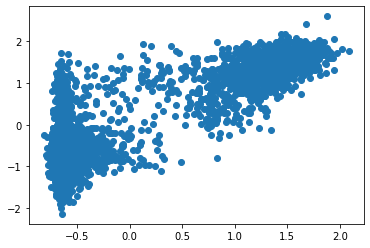

In [9]:
plt.scatter(pred.detach().cpu().flatten(), enrichment)

In [10]:
seqs = pd.read_csv('graph_generation/data/archive/aug_8/3eak_gen_3.tsv', sep='\t')[['cdr3']]
seq_counts = {}

for seq in seqs.values:
    seq = seq[0]
    for char in seq:    
        if char in seq_counts:
            seq_counts[char] += 1
        else:
            seq_counts[char] =1

In [11]:
seed_seqs = pd.read_csv('graph_generation/data/archive/aug_8/top_seeds.csv')[['cdr3']]
seed_seq_counts = {}

for seq in seed_seqs.values:
    seq = seq[0]
    for char in seq:
        if char in seed_seq_counts:
            seed_seq_counts[char] += 1
        else:
            seed_seq_counts[char] =1

<BarContainer object of 21 artists>

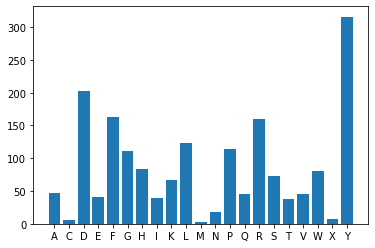

In [12]:
sorted_seed_seq_counts = {}
for key in sorted(seed_seq_counts):
    sorted_seed_seq_counts[key] = seed_seq_counts[key]

plt.bar(sorted_seed_seq_counts.keys(), sorted_seed_seq_counts.values())

<BarContainer object of 18 artists>

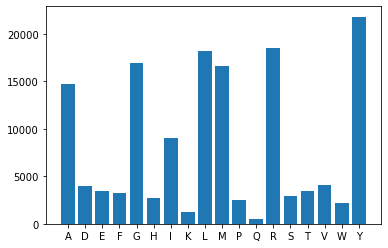

In [13]:
sorted_seq_counts = {}
for key in sorted(seq_counts):
    sorted_seq_counts[key] = seq_counts[key]

plt.bar(sorted_seq_counts.keys(), sorted_seq_counts.values())